# Obtendo Dados do INMET

- Obtenção do inventário de estações do INMET
- Download de dados
- Exportação dos dados

In [3]:
import hydrobr
import geopandas as gpd
from shapely.geometry import Point

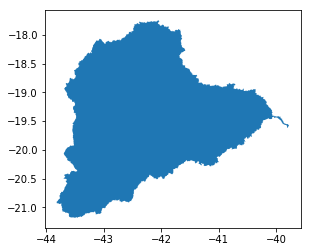

In [5]:
#Abrindo o shapefile da área de interesse
area = gpd.read_file(r'shapefiles/bacia_doce.shp')
#Plotando o shapefile da área de interesse
area.plot()

Filtrando as estações por área

In [23]:
def select_stations_area(area, list_stations, buffer=0):
    """
    Seleciona as estações que estão dentro de uma área de interesse.
    :param area: Área de interesse como um objeto GeoPandas
    :param list_stations: Lista de estações como objeto geopandas
    :param buffer: Float, Opcional, Padrão = 0 - Buffer na área de interesse
    :return: Retorna um objeto Geopandas com as estações selecionadas
    """
    #Converte o formato das colunas Latitude e Longitude
    if list_stations.Longitude.dtype != float:
        list_stations.Longitude = list_stations.Longitude.astype(float)
    if list_stations.Latitude.dtype != float:
        list_stations.Latitude = list_stations.Latitude.astype(float)   
    
    # Cria uma Geometria de Pontos
    pontos=[Point(x) for x in zip(list_stations.Longitude,list_stations.Latitude)]
    crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} #SC WGS 84
    
    # Define o sistema de coordenadas como WGS 84
    list_stations=gpd.GeoDataFrame(list_stations,crs=crs,geometry=pontos)
    
    # Seleciona as estações que estão dentro da bacia
    list_stations = list_stations[list_stations.geometry.within(area.geometry[0].buffer(buffer))]
    return list_stations

In [33]:
# Obtendo as estações automaticas e convencionais
lista_inmet = hydrobr.get_data.INMET.list_stations() 
# Filtrando as estações por área
lista_inmet_doce  = select_stations_area(area,lista_inmet)
#Visualizando o GeoDataFrame
lista_inmet_doce

,Code,Type,Name,State,Latitude,Longitude,Height,Start Operation,End Operation,geometry
34,83589,Conventional,C. DO MATO DENTRO,MG,-19.020355,-43.433948,663.02,1925-06-29 21:00:00-03:00,In operation,POINT (-43.43395 -19.02035)
45,83592,Conventional,CARATINGA,MG,-19.735765,-42.137222,609.56,1924-03-14 21:00:00-03:00,In operation,POINT (-42.13722 -19.73577)
2,A657,Automatic,AFONSO CLAUDIO,ES,-20.104167,-41.106944,507.48,2011-09-23 21:00:00-03:00,In operation,POINT (-41.10694 -20.10417)
7,A534,Automatic,AIMORES,MG,-19.532768,-41.090801,287.74,2007-08-04 21:00:00-03:00,In operation,POINT (-41.09080 -19.53277)
129,A554,Automatic,CARATINGA,MG,-19.735757,-42.137146,609.25,2007-05-23 21:00:00-03:00,In operation,POINT (-42.13715 -19.73576)
232,A532,Automatic,GOVERNADOR VALADARES,MG,-18.830354,-41.977007,198.24,2007-05-26 21:00:00-03:00,In operation,POINT (-41.97701 -18.83035)
235,A533,Automatic,GUANHAES,MG,-18.786944,-42.943056,852.68,2007-06-01 21:00:00-03:00,In operation,POINT (-42.94306 -18.78694)
328,A556,Automatic,MANHUACU,MG,-20.263333,-42.182778,819.47,2010-09-24 21:00:00-03:00,In operation,POINT (-42.18278 -20.26333)
337,A632,Automatic,MARILANDIA,ES,-19.407181,-40.539825,95,2017-03-21 21:00:00-03:00,In operation,POINT (-40.53983 -19.40718)
566,A511,Automatic,TIMOTEO,MG,-19.573889,-42.622500,493.42,2006-02-21 21:00:00-03:00,In operation,POINT (-42.62250 -19.57389)


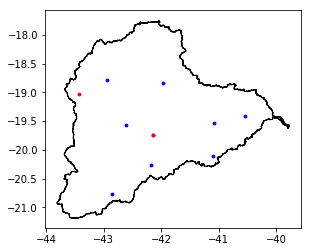

In [38]:
base = area.plot(color='white', edgecolor='black')
lista_inmet_doce[lista_inmet_doce.Type == 'Automatic'].plot(ax=base,marker='o',color='blue', markersize=8)
lista_inmet_doce[lista_inmet_doce.Type == 'Conventional'].plot(ax=base,marker='o',color='red', markersize=8)

In [39]:
dados_caratinga = hydrobr.get_data.INMET.hourly_data('A554')

6it [01:50, 15.12s/it]


In [40]:
dados_caratinga.head()

,Tins,Tmax,Tmin,RHins,RHmax,RHmin,DPins,DPmax,DPmin,Pins,Pmax,Pmin,Wspeed,Wdir,Wgust,Rad,Prec
2007-05-23 17:00:00,27.3,None,None,49,None,None,15.5,None,None,940.9,None,None,3.1,339,None,435.604,0
2007-05-23 18:00:00,27,28.1,26.7,49,50,46,15.4,16.2,14.9,940.5,941,940.5,3,335,5.6,1532.998,0
2007-05-23 19:00:00,26.3,27.5,26.3,51,51,48,15.3,15.8,14.9,940.3,940.5,940.3,2.8,341,6.2,1112.691,0
2007-05-23 20:00:00,24.9,26.3,24.9,57,58,51,15.9,16.1,15.3,940.7,940.7,940.2,1.4,339,5,352.086,0
2007-05-23 21:00:00,22.2,24.9,22.2,70,70,57,16.5,16.6,15.9,941.2,941.2,940.7,0.5,67,2.9,6.095,0


In [54]:
import pandas as pd
# Criando dataframes vazios
dados_temperatura=pd.DataFrame()
dados_prec=pd.DataFrame()

lista_selecionada = lista_inmet_doce[lista_inmet_doce.Type == 'Automatic']

for code in lista_selecionada.Code.to_list():
    dados = hydrobr.get_data.INMET.daily_data(code)
    dados_temperatura = pd.concat([dados_temperatura,dados.Tmean.rename(code)], axis=1)
    dados_prec = pd.concat([dados_prec,dados.Prec.rename(code)], axis=1)

In [59]:
from plotly.offline import plot
gantt_fig = hydrobr.Plot.gantt(dados_temperatura)
#Atualizando o layout da figura
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Ano',
    yaxis_title = 'Código da Estação',
    font=dict(family="Courier New, monospace", size=12))

#Plotando
plot(gantt_fig,filename='Gantt_Doce_Temp' + '.html')

'Gantt_Doce_Temp.html'